In [2]:
!pip install PyWavelets

In [3]:
import cv2 as cv
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#wavelet transform is very effective for feature detectiom images

In [15]:
def w2d(img,mode="haar",level=1):
    imArray=img
    #conversion to grayscale
    imArray=cv.cvtColor(imArray,cv.COLOR_BGR2GRAY)
    
    #conversion to float
    imArray=np.float32(imArray)
    imArray/=255
    
    #wavelet decomposition
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process coeffecients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H
    
    

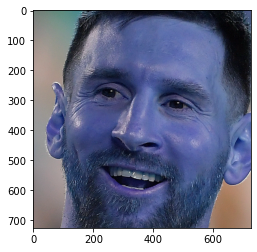

In [18]:
cropped=cv.imread('./dataset/cropped/lionel_messi/lionel_messi11.png')
plt.imshow(cropped)

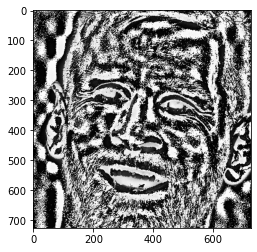

In [19]:
cropped_wt=w2d(cropped,'db10',5)
plt.imshow(cropped_wt,cmap="gray")

In [20]:

import os

In [24]:
cropped_img_dirs=[]
path_to_cr_data="./dataset/cropped/"

for entry in os.scandir(path_to_cr_data):
    cropped_img_dirs.append(entry.path)
cropped_img_dirs


['./dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federar',
 './dataset/cropped/serena_williams',
 './dataset/cropped/virat_kohli']

In [25]:
celebrity_file_names_dict=dict()

for img_dir in cropped_img_dirs:
    celebrity_name=img_dir.split("/")[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    if celebrity_name not in celebrity_file_names_dict:
        celebrity_file_names_dict[celebrity_name]=file_list
    else:
        celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\\lionel_messi27.png',
  './dataset/cropped/lionel_messi\

In [26]:
class_dict={}

count=0
for names in celebrity_file_names_dict.keys():
    class_dict[names]=count
    count+=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federar': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [28]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img=cv.imread(training_img)
        scaled_raw_img=cv.resize(img,(32,32))
        img_har=w2d(img,"db1",5)
        scaled_img_har=cv.resize(img_har,(32,32))
        stacked_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(stacked_img)
        y.append(class_dict[celebrity_name])
        
        
  

In [31]:
len(x)

260

In [32]:
len(y)

260

In [33]:
x #each element in x is an img

[array([[ 27],
        [ 17],
        [ 22],
        ...,
        [237],
        [ 31],
        [248]], dtype=uint8),
 array([[118],
        [107],
        [194],
        ...,
        [ 61],
        [236],
        [ 31]], dtype=uint8),
 array([[116],
        [126],
        [120],
        ...,
        [  4],
        [  1],
        [215]], dtype=uint8),
 array([[175],
        [165],
        [141],
        ...,
        [233],
        [ 21],
        [183]], dtype=uint8),
 array([[ 95],
        [ 76],
        [ 89],
        ...,
        [ 58],
        [155],
        [156]], dtype=uint8),
 array([[ 79],
        [ 81],
        [ 81],
        ...,
        [224],
        [  3],
        [252]], dtype=uint8),
 array([[221],
        [193],
        [193],
        ...,
        [  2],
        [  4],
        [ 16]], dtype=uint8),
 array([[ 96],
        [105],
        [114],
        ...,
        [205],
        [  4],
        [  1]], dtype=uint8),
 array([[ 86],
        [ 82],
        [ 71],
        ...

In [35]:
len(x[0]) ##raw =32*32*3 + img_har=32*32 =4096

4096

In [37]:
#float

X=np.array(x).reshape(len(x),4096).astype(float)
X.shape

(260, 4096)